In [1]:
#pandas 라이브러리 불러오기!
import pandas as pd

### Series
- 1차원 데이터
- 인덱스와 값이 1:1로 구성되어있는 형태
- Series 써줄때는 항상 대문자로 써야함

In [13]:
#Series 데이터 구조 생성하기~
population = pd.Series([9668465,3391946,2942828,1450062])
population

0    9668465
1    3391946
2    2942828
3    1450062
dtype: int64

In [3]:
#인덱스 이름 지정해서 생성하기
population = pd.Series([9668465,3391946,2942828,1450062], index=['서울','부산','인천','광주'])
population

서울    9668465
부산    3391946
인천    2942828
광주    1450062
dtype: int64

### Series 데이터 확인하기

In [4]:
#Series 의 값만 확인하기
population.values

array([9668465, 3391946, 2942828, 1450062], dtype=int64)

In [5]:
#Series 의 인덱스만 확인하기!
population.index
pop

NameError: name 'pop' is not defined

In [ ]:
#Series 데이터 타입 확인하기!
population.dtype
#index는 고정값 이기 때문에 dtype->value 데이터의 타입니다.!

In [ ]:
population

### Series 데이터에 이름 지정해주기(데이터의 정보를 나타내주기)
- name
- index.name

In [80]:
#Series에 이름 지정하기
population.name='인구'
population

서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 인구, dtype: int64

In [81]:
population.index.name='도시'
population

도시
서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 인구, dtype: int64

### Series 연산
- 넘파이 배열 형태이기 때문에 요소별 연산이 가능하다!

In [ ]:
population/1000000

### Series 인덱싱 , 슬라이싱

In [ ]:
# 스스로 부산의 인구수 가져올 수 있는가?
population[1]

In [ ]:
#변수명['지정해준 이름']
population['부산'] # 다른 방법

In [79]:
#인덱싱을 활용해서 서울,광주,부산 값을 한번에 가져오기! -> ['서울','광주','부산'] 이렇게 리스트안에 넣어서
#가저오면 됨
#슬라이싱 x
#여러개의 데이터를 묶어서 동시에 가져오는 방법
population[[0,3,1]]
population[['서울','광주','부산']] #이 방법도 됨

서울    9668465
광주    1450062
부산    3391946
dtype: int64

### 슬라이싱

In [ ]:
population

In [ ]:
# 변수명[시작인덱스 : 끝인덱스+1]
# 부산~ 인천
population[1:3]

In [ ]:
# 인덱스의 이름으로 슬라이싱 할 때는 끝 인덱스이름을 가져오면 된다.
# 더하기+1 안해줘도 된다.
population['부산':'인천'] # 이 방법도 됨

### 불리언 인덱싱

In [ ]:
population>=2500000 # 논리값

In [ ]:
# 인구가 250만 이상인 도시들만 가져오세요~
population[population>=2500000] #불리언 인덱싱

In [ ]:
# 인구수가 250만 이상이고 500만 이하인 도치 찾기! --> 부산, 인천
(population>=2500000) & (population<=5000000) # 뭐 부터 할지 ()로 묶어줘야함
population[(population>=2500000) & (population<=5000000)]

### dictionary 자료구조를 활용하여 Series 생성하기!
- dictionary -> {key : value}
- key 값은 index
- value 값은 value

In [82]:
# 포켓몬이름 : 능력치
data = {'피카츄':9631 , '꼬부기':3393, '파이리':1490, '이상해씨': 2632}
data
pokemon=pd.Series(data)
pokemon

피카츄     9631
꼬부기     3393
파이리     1490
이상해씨    2632
dtype: int64

In [83]:
# 레벨업한 데이터가 들어있는 Series 생성하기
data2 = {'피카츄':9904,'꼬부기':3448,'고라파덕':2466,'팡규':1}
pokemon_up=pd.Series(data2)
pokemon_up

피카츄     9904
꼬부기     3448
고라파덕    2466
팡규         1
dtype: int64

In [85]:
# 올라간 능력치 계산해주기 !
# 인덱스명이 달라졌을 때 Series 는 어떻게 연산을 해줄까?
stat=pokemon_up - pokemon
stat
#NaN = not a number = null 

고라파덕      NaN
꼬부기      55.0
이상해씨      NaN
파이리       NaN
팡규        NaN
피카츄     273.0
dtype: float64

- 비어있는 데이터가 존재할 때 처리하는 방법

In [86]:
stat.notnull() # 논리식이 나와버림 -> 불리언 방식으로 해줘야됨

고라파덕    False
꼬부기      True
이상해씨    False
파이리     False
팡규      False
피카츄      True
dtype: bool

In [87]:
#비어있지 않은 데이터들만 보고싶다면? -> notnull()
stat[stat.notnull()] # 불리언 방식으로 또 해줘야됨

꼬부기     55.0
피카츄    273.0
dtype: float64

In [88]:
#비어있는 데이터들만 출력해보기! -> isnull()
stat[stat.isnull()]# 불리언 방식으로 또 해줘야됨

고라파덕   NaN
이상해씨   NaN
파이리    NaN
팡규     NaN
dtype: float64

In [89]:
# 레벨업해서 올라간 공격력의 증가율(%) 계산해보기!
# (레벨업한데이터-원래데이터) / 원래데이터 * 100
change = (pokemon_up - pokemon)/pokemon*100
change

고라파덕         NaN
꼬부기     1.620984
이상해씨         NaN
파이리          NaN
팡규           NaN
피카츄     2.834597
dtype: float64

In [90]:
# 비어있지 않은 값들만 출력해보기
change[change.notnull()]

꼬부기    1.620984
피카츄    2.834597
dtype: float64

### Series 추가, 갱신, 삭제

In [ ]:
# 원래 데이터
stat

In [ ]:
#Series 데이터 추가하는 방법
stat['야돈'] = 1616


In [ ]:
#Series 데이터 수정하는 방법
stat['팡규'] = 2
# 기존에 있는 인덱스 (수정하고 싶은 인덱스) 명칭을 활용하여 수정 가능

In [ ]:
#Series 데이터 삭제하는 방법
del stat['파이리']

In [ ]:
stat

In [6]:
import pandas as pd

### DataFrame
- Series는 1차원 데이터이지만 DataFrame은 2차원 데이터이다!
- DataFrame은 행과 열로 구성되어 있는 표와 같은 형태이다!

In [7]:
#dictionary 구조를 활용하여 DataFrame 생성하기
data = {'2020':[9668465,3391946,2942828,1450062],
       '2010':[10312545,3567910,2758296,1454636]}

In [9]:
# 키값은 컬럼으로 value값은 (데이터)로 생성된다
# 인덱스는 자동지정됨
df=pd.DataFrame(data)
df

,2020,2010
0,9668465,10312545
1,3391946,3567910
2,2942828,2758296
3,1450062,1454636


In [10]:
# DataFrame index 명칭 바꿔주기!
df.index = ['서울','부산','인천','광주']
df

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


In [13]:
#list 구조를 활용해서 DataFrame 생성하기 #2차원 배열 [[ㅁ,ㅁ]]
data2 = [[9668465,3391946,2942828,1450062],
         [10312545,3567910,2758296,1454636]]
col=['서울','부산','인천','광주']
ind=['2020','2010']
df2=pd.DataFrame(data2, index=ind, columns=col) 
df2
#pd.DataFrame(데이터값, index= ? , columns=?)

,서울,부산,인천,광주
2020,9668465,3391946,2942828,1450062
2010,10312545,3567910,2758296,1454636


In [14]:
#DataFrrame 전치시키기 (Tranpose)
df2.T

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


### 데이터 구조 확인하기 (3가지 속성)
- values : 값, 데이터 확인하기
- index : 인덱스 값 확인하기
- column : 컬럼 값 확인하기

In [15]:
#1. DataFrame 에서 값만 확인하기!
df.values

array([[ 9668465, 10312545],
       [ 3391946,  3567910],
       [ 2942828,  2758296],
       [ 1450062,  1454636]], dtype=int64)

In [16]:
#2. DataFrame의 index만 확인하기!
df.index

Index(['서울', '부산', '인천', '광주'], dtype='object')

In [17]:
#3. DataFrame의 column 확인하기!
df.columns

Index(['2020', '2010'], dtype='object')

### DataFrame 인덱싱, 슬라이싱
- DataFrame의 인덱싱은 열 인덱스만 가능하다
- DataFrame 열 인덱스 확인하기

In [18]:
df

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


In [22]:
#2020년도 데이터 가져오기!
df['2020'] #<- 1차원 #Series 형태로 출력이 된다! 1차원이니까 대괄호 [] 한개

서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 2020, dtype: int64

In [23]:
# DataFrame 형태로 보고싶다면? 2차원으로 가져오면된다! 대괄호 [[]] 두개
df[['2020']]#<- 2차원

,2020
서울,9668465
부산,3391946
인천,2942828
광주,1450062


In [24]:
#두개의 열 가져오기  --> 변수명[[ㅁ,ㅁ]]
df[['2020','2010']] #DataFrame 형태로 가져와진다!

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


In [25]:
# 1개의 대괄호로 인덱싱 해오면 오류가 난다!
# Series가 두개 모이면 DataFrame이 돼버리기 때문에!
df['2020','2010'] # <-- 차원이 안맞아서 오류남 데이터가 1개면 1차원 2개면 2차원

KeyError: ('2020', '2010')

- DataFrame 열 추가하기!

In [26]:
#새로운 column(열)을 추가하고 싶다면?
df['2005'] = [9762456,3512547,2517680,1456016] # <-- 데이터가 여러개일 때는 list 형태로 묶어야 함
df

,2020,2010,2005
서울,9668465,10312545,9762456
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


- DataFrame 열 삭제하기!

In [27]:
df.drop('부산')

,2020,2010,2005
서울,9668465,10312545,9762456
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [31]:
#인덱스 번호로 삭제 <- 삭제안됨
df.drop(df.index[1])#삭제안됨 이유는 진짜 삭제하고 싶으면 변수에 저장을 해야댐

,2020,2010,2005
서울,9668465,10312545,9762456
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [32]:
#삭제한 결과를 다시 df에 대입해줘야 결과값이 적용이 된다
df = df.drop('부산')# <- 이렇게 변수에 저장을 해야 실제로 삭제됨
df

,2020,2010,2005
서울,9668465,10312545,9762456
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [33]:
df

,2020,2010,2005
서울,9668465,10312545,9762456
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [35]:
df.drop('2010',axis=1) #shift+tab 눌러서 속성확인 asix = 축(열) [행은 0 축(열)은 1]
#행(부산)을 삭제하는게 디폴트값이라서 삭제되지만 열(2010)로 삭제하고 싶은경우 위 방법으로 해야댐
#axis = 0 : 행 // axis=1 : 열 , 속성변환법 = df.drop('열값',axis=1 or 0)

,2020,2005
서울,9668465,9762456
인천,2942828,2517680
광주,1450062,1456016


In [36]:
# 매번 대입해주지 않아도 코드 실행시 바로 적용하고 싶다면 ?
# inplace 속성 활용하기!
df.drop('2010', axis=1, inplace= True)

In [37]:
df

,2020,2005
서울,9668465,9762456
인천,2942828,2517680
광주,1450062,1456016


- DataFrame 수정하기!

In [38]:
df

,2020,2005
서울,9668465,9762456
인천,2942828,2517680
광주,1450062,1456016


In [44]:
# 컬럼이름 변경하기
# df.rename(columns = {변경하기 전 이름 : 변경하기 후 이름})
df.rename(columns = {'2005':'2010'},inplace=True)

In [42]:
# 인덱스 이름 변경하기
df.rename(index = {'인천':'대구'},inplace=True)

In [45]:
df

,2020,2010
서울,9668465,9762456
대구,2942828,2517680
광주,1450062,1456016


### 행슬라이싱

In [1]:
import pandas as pd

In [2]:
data3 = {'2020':[9668465,3391946,2942828,1450062],
        '2010' :[10312545,3567910,2758296,1454636],
         '2005':[9762546,3512547,2517680,1456016]
        }
df3 = pd.DataFrame(data3,index = ['서울','부산','인천','광주'])
df3

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [52]:
# 서울, 부산 데이터 가져오기
df3[0:2]

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547


In [53]:
df3

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


### 인덱서
- loc : 실제 인덱스 이름. 실제컬럼이름으로 가져올 때 사용한다!
- iloc : 인덱스번호로 가져올 때 사용한다!
- 데이터변수명.loc[행,열]

In [54]:
df3

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [57]:
# DataFrame 에서 행과 열 단위로 슬라이싱 해오고 싶을 때는 인덱서를 사용!
# 부산~인천 , 2020~2010
df3.loc['부산':'인천','2020':'2010']

,2020,2010
부산,3391946,3567910
인천,2942828,2758296


In [58]:
df3

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [59]:
#iloc 사용해서 부산~인천 , 2020 ~ 2010 데이터 가져오기!
# lioc -> 인덱스 번호를 활용해서 가져온다!
df3.iloc[1:3,0:2]

,2020,2010
부산,3391946,3567910
인천,2942828,2758296


### Boolean indexing

In [61]:
df3

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [4]:
# 2010년데이터에서 250만 이상인 데이터만 가져오세요!
b=df3[df3.iloc[:,1]>=2500000]
c=pd.DataFrame(b.iloc[:,1])
c

,2010
서울,10312545
부산,3567910
인천,2758296


In [15]:
df3

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


In [17]:
#전체 데이터에서 인구수가 250만 이상인 도시
df3[df3>=2500000]

,2020,2010,2005
서울,9668465.0,10312545.0,9762546.0
부산,3391946.0,3567910.0,3512547.0
인천,2942828.0,2758296.0,2517680.0
광주,NaN,NaN,NaN


In [11]:
# 2010년 데이터에서 인구수가 250만 이상인 도시를 가져오세요!
df3[['2010']][df3['2010']>=2500000] #전체 250만이상인 데이터와 2010년 데이터를 비교

,2010
서울,10312545
부산,3567910
인천,2758296


In [14]:
# 전체데이터에서 인구수가 350만 이상인 도시들을 가져오세요~
df3[df3>=3500000] # 인구수가 350만 이상인 것과 전체데이터를 비교해주겠다는 뜻
# 조건에 맞지 않은 값들은 NaN(결측치)로 표현이 된다!

,2020,2010,2005
서울,9668465.0,10312545.0,9762546.0
부산,NaN,3567910.0,3512547.0
인천,NaN,NaN,NaN
광주,NaN,NaN,NaN


### DataFrame 실습
- population.csv

In [21]:
# csv 파일 업로드하기!
population=pd.read_csv('population.csv',index_col = '도시')#index_col : 인덱스로 사용하겠다 설정
population

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016


### 데이터 정렬하기!

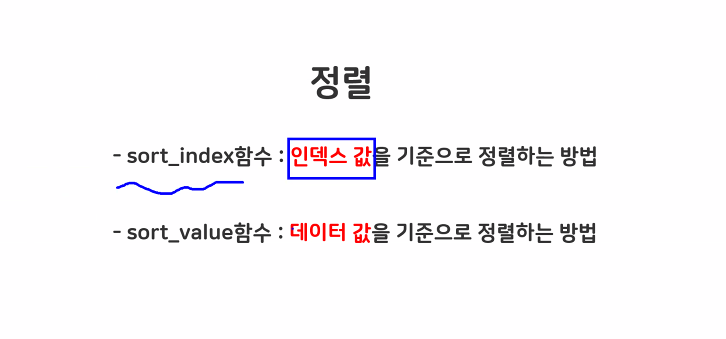


In [22]:
# 인덱스 값을 기준으로 정렬하기
population.sort_index()

,지역,2020,2015,2010,2005
도시,,,,,
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016
부산,경상권,3391946,NaN,NaN,3628293
서울,수도권,9668465,10022181.0,10312545.0,10167344
인천,수도권,2942828,2925815.0,NaN,2600495


In [25]:
# 데이터를 기준으로 정렬하기! -> 열 인덱싱해서 정렬 (기준)
population['2010'].sort_values()
# 정렬 후 결측치는 제일 아래로 정렬된다

도시
광주     1454636.0
대구     2431774.0
서울    10312545.0
부산           NaN
인천           NaN
Name: 2010, dtype: float64

In [26]:
# 내림차 순 정렬 shift+tab 해서 속성값 확인하고 ascending을 바꿔주면 됨
population['2010'].sort_values(ascending=False)
# 내림차 순 이어도 마찬가지로 결측치는 제일 아래로 정렬!

도시
서울    10312545.0
대구     2431774.0
광주     1454636.0
부산           NaN
인천           NaN
Name: 2010, dtype: float64

In [27]:
# 전체데이터를 출력하고 싶을 때?
population.sort_values(by = '2010')# by 기준으로 전체 데이터를 정렬함

,지역,2020,2015,2010,2005
도시,,,,,
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495


In [28]:
# 지역먼저 정렬해주고 같은 값이 존재하면 컴마(,)를 기준으로 뒤에 정렬해줌
population.sort_values(by=['지역','2020'])
# 먼저 지역순으로 정렬해주고 (ㄱ~ㅎ 순) 그 다음 2020년을 기준으로 정렬해줌

,지역,2020,2015,2010,2005
도시,,,,,
대구,경상권,2418436,2466052.0,2431774.0,2456016
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
서울,수도권,9668465,10022181.0,10312545.0,10167344
광주,전라권,1450062,1474636.0,1454636.0,1401745


- fillna()

In [31]:
# 결측치(NaN)를 원하는 값으로 바꿔줄 때 사용한다.
population.fillna(value=0, inplace =True)

In [3]:
population

NameError: name 'population' is not defined

In [4]:
import pandas as pd

In [5]:
# score.csv 데이터 읽어오기! # 속성값은 () 안에 적어줌 shift+tab 해서 속성값 봄
# index 과목으로 가져오기
score=pd.read_csv('score.csv', encoding='euc-kr', index_col='과목')
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [6]:
# 학급별 총합 구해보기
score.sum()

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [7]:
# 학급별 점수 순위 (점수가 높은 반부터 위에서 아래로 정렬!)
score.sum().sort_values(ascending=False)

2반    388
3반    295
1반    271
4반    243
dtype: int64

In [8]:
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [9]:
# 과목별 합계 구하기! 
score.sum(axis=1)
# 범용함수의 축 기본설정이 행끼리 더하기로 되어있다!
# axis=0 : 행
# axis=1 : 열

과목
파이썬    201
DB     282
자바     253
크롤링    298
Web    163
dtype: int64

In [10]:
score.sum(axis=1).sort_values(ascending=False)

과목
크롤링    298
DB     282
자바     253
파이썬    201
Web    163
dtype: int64

In [11]:
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [12]:
# '합계' 컬럼 추가해서 과목별 합계를 붙여주기!
score['합계'] = score.sum(axis=1) # 값 추가하기
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [18]:
# 과목별 평균을 구해서 '평균' 컬럼 추가해주세요!
score['평균'] = score.iloc[0:5,0:4].mean(axis=1) # 합계를 가져오면 안되니까 슬라이싱
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45,44,73,39,201,50.25
DB,76,92,45,69,282,70.50
자바,47,92,45,69,253,63.25
크롤링,92,81,85,40,298,74.50
Web,11,79,47,26,163,40.75


In [25]:
# 반평균을 계산해서 '반평균'행 추가해주기
score.iloc[0:5,0:4].mean(axis=0)

1반    54.2
2반    77.6
3반    59.0
4반    48.6
dtype: float64

### 행 추가하는 방법 : 표이름.loc['행이름']
### 열 추가하는 방법 : 표이름['열이름']
### 결측치 -> 0 으로 바꾸는 방법 : 표이름.fillna(value=0,inplace=True)

In [24]:
score.loc['반평균']=score.iloc[0:5,0:4].mean(axis=0)
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45.0,44.0,73.0,39.0,201.0,50.25
DB,76.0,92.0,45.0,69.0,282.0,70.50
자바,47.0,92.0,45.0,69.0,253.0,63.25
크롤링,92.0,81.0,85.0,40.0,298.0,74.50
Web,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,NaN,NaN


In [27]:
score.fillna(value=0, inplace =True) 
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45.0,44.0,73.0,39.0,201.0,50.25
DB,76.0,92.0,45.0,69.0,282.0,70.50
자바,47.0,92.0,45.0,69.0,253.0,63.25
크롤링,92.0,81.0,85.0,40.0,298.0,74.50
Web,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,0.0,0.00


In [38]:
# 과목별 최대점수 - 최소점수 구하기!
# 1. 과목별 최대점수 (maxScore) -> loc
maxScore=score.loc['파이썬':'Web','1반':'4반'].max(axis=1)
maxScore

과목
파이썬    73.0
DB     92.0
자바     92.0
크롤링    92.0
Web    79.0
dtype: float64

In [31]:
# 2. 과목별 최소점수 (minScore) -> iloc
minScore=score.iloc[0:5,0:4].min(axis=1)
minScore

과목
파이썬    39.0
DB     45.0
자바     45.0
크롤링    40.0
Web    11.0
dtype: float64

In [40]:
# 3. maxScore - minScore
maxScore-minScore

과목
파이썬    34.0
DB     47.0
자바     47.0
크롤링    52.0
Web    68.0
dtype: float64

In [34]:
pd.Data

,0
과목,
파이썬,73.0
DB,92.0
자바,92.0
크롤링,92.0
Web,79.0


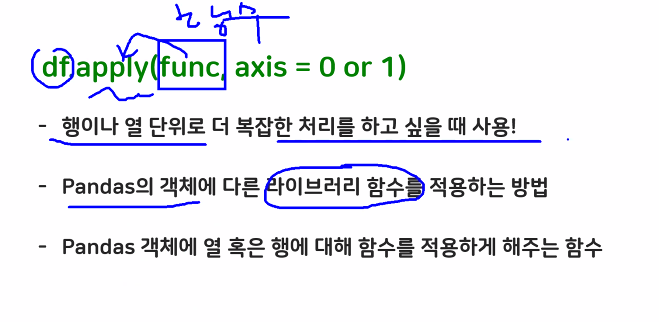

### apply 함수
- 행이나 열 단위로 복잡한 함수를 사용하고 싶을 때 사용한다
- df.apply(axis = 0 or 1) --default값은 0

In [41]:
# 큰 값에서 작은 값을 빼주는 우리만의 함수 max_min 정의
def max_min(x):
    return x.max()-x.min()

In [44]:
score.iloc[:5,:4].apply(max_min, axis=1) # .apply(함수 이름)
#위에서 복잡하게 했지만 apply 함수 쓰면 간단하게 가능

과목
파이썬    34.0
DB     47.0
자바     47.0
크롤링    52.0
Web    68.0
dtype: float64

### 카테고리 생성하기

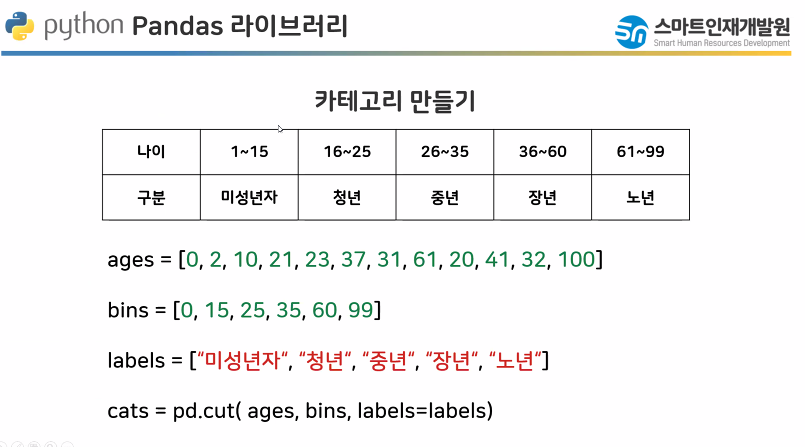

In [47]:
# 카테고리 생성하기
# 1. 데이터
age=[0,2,10,21,23,15,31,61,41,100,58,72,54]
# 2. 범주(bins)
bins = [-1,19,35,60,100] # 0은 결측치값 나오니까 -1부터 시작하면 됨
# 시작값 - 중간값 - 끝값
# 3. 범주의 명칭
labels = ['미성년자','청년','중년','노년']

# 0~19 : 미성년자
# 20~35 : 청년
# 36~60 : 중년
# 61~100 : 노년
cate = pd.cut(age,bins,labels=labels) # 속성이름 = 변수 넣어주는것
cate

['미성년자', '미성년자', '미성년자', '청년', '청년', ..., '중년', '노년', '중년', '노년', '중년']
Length: 13
Categories (4, object): ['미성년자' < '청년' < '중년' < '노년']

- [age 데이터들의 카테고리화된 각각의 결과들]
- 데이터의 길이(개수)
- 카테고리 개수

In [48]:
#카테고리만 보고싶을 때
cate.categories

Index(['미성년자', '청년', '중년', '노년'], dtype='object')

In [49]:
#타입
type(cate)

pandas.core.arrays.categorical.Categorical

In [54]:
#age 데이터로 DateFrame 생성하기
age_df = pd.DataFrame(age, columns = ['age'])

In [59]:
# 카테고리(cate) 열 추가해주기 !
age_df['카테고리']=cate
age_df

,age,카테고리
0,0,미성년자
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,15,미성년자
6,31,중년
7,61,노년
8,41,중년
9,100,노년


In [60]:
# 카테고리별로 나이 개수 확인하기! : value_counts()
# value_counts() : 값(value)들이 몇개 있는지 세어주는 함수 (범주형 테이더)
age_df['카테고리'].value_counts()

미성년자    4
중년      4
노년      3
청년      2
Name: 카테고리, dtype: int64

### 데이터프레임 병합하기
- concat([DataFrame1, DataFrame2, DataFrame3])

In [61]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3'],
                    'C':['C0','C1','C2','C3']
                   }, index = [0,1,2,3])
df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                    'B':['B4','B5','B6','B7'],
                    'C':['C4','C5','C6','C7']},
                  index= [4,5,6,7])
df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                    'B':['B8','B9','B10','B11'],
                    'C':['C8','C9','C10','C11']},
                  index= [8,9,10,11])

In [62]:
# df1,df2,df3 병합하기!
pd.concat([df1,df2,df3])

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5
6,A6,B6,C6
7,A7,B7,C7
8,A8,B8,C8
9,A9,B9,C9


In [63]:
# 다중 인덱스 부여하기 keys=['','','' ...]
pd.concat([df1,df2,df3],keys=['df1','df2','df3'])

A    B    C
df1 0    A0   B0   C0
    1    A1   B1   C1
    2    A2   B2   C2
    3    A3   B3   C3
df2 4    A4   B4   C4
    5    A5   B5   C5
    6    A6   B6   C6
    7    A7   B7   C7
df3 8    A8   B8   C8
    9    A9   B9   C9
    10  A10  B10  C10
    11  A11  B11  C11

In [65]:
# 열방향으로 데이터 병합하기! (df1,df2,df3)
pd.concat([df1,df2,df3], axis=1, keys=['df1','df2','df3'])

df1            df2            df3          
      A    B    C    A    B    C    A    B    C
0    A0   B0   C0  NaN  NaN  NaN  NaN  NaN  NaN
1    A1   B1   C1  NaN  NaN  NaN  NaN  NaN  NaN
2    A2   B2   C2  NaN  NaN  NaN  NaN  NaN  NaN
3    A3   B3   C3  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN   A4   B4   C4  NaN  NaN  NaN
5   NaN  NaN  NaN   A5   B5   C5  NaN  NaN  NaN
6   NaN  NaN  NaN   A6   B6   C6  NaN  NaN  NaN
7   NaN  NaN  NaN   A7   B7   C7  NaN  NaN  NaN
8   NaN  NaN  NaN  NaN  NaN  NaN   A8   B8   C8
9   NaN  NaN  NaN  NaN  NaN  NaN   A9   B9   C9
10  NaN  NaN  NaN  NaN  NaN  NaN  A10  B10  C10
11  NaN  NaN  NaN  NaN  NaN  NaN  A11  B11  C11

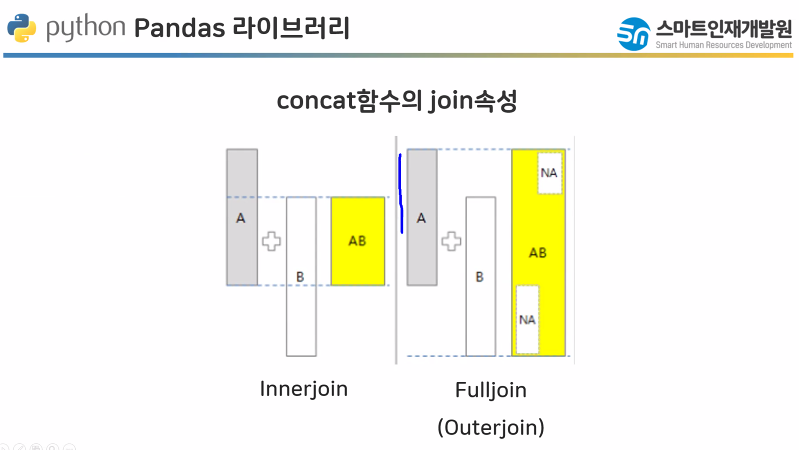
### NaN 이 나오는 이유 : innerjoin = 교집합 // fulljoin = 합집합 빈부분은 NaN

In [69]:
df4 = pd.DataFrame({'B':['B2','B3','B6','B7'],
                    'D':['D2','D3','D6','D7'],
                    'F':['F2','F3','F6','F7']
                   }, index = [2,3,6,7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [70]:
df1

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3


In [71]:
# df1,df4 병합하기 (열방향)
pd.concat([df1,df4],axis=1) # fulljoin 형태의 병합! (디폴트값)

,A,B,C,B,D,F
0,A0,B0,C0,NaN,NaN,NaN
1,A1,B1,C1,NaN,NaN,NaN
2,A2,B2,C2,B2,D2,F2
3,A3,B3,C3,B3,D3,F3
6,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,B7,D7,F7


In [72]:
# inner Join -> shift+tab 눌러서 join 속성을 inner 로 바꿔주면 됨 : 교집합
# 같은 것들 끼리만 출력
pd.concat([df1,df4],axis=1, join='inner')

,A,B,C,B,D,F
2,A2,B2,C2,B2,D2,F2
3,A3,B3,C3,B3,D3,F3


In [74]:
# 기존의 인덱스 번호를 무시하고 새로운 인덱스 부여하는 방법 : ignore_index=True
pd.concat([df1,df4],ignore_index=True)

,A,B,C,D,F
0,A0,B0,C0,NaN,NaN
1,A1,B1,C1,NaN,NaN
2,A2,B2,C2,NaN,NaN
3,A3,B3,C3,NaN,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


### Pandas 최종 실습!

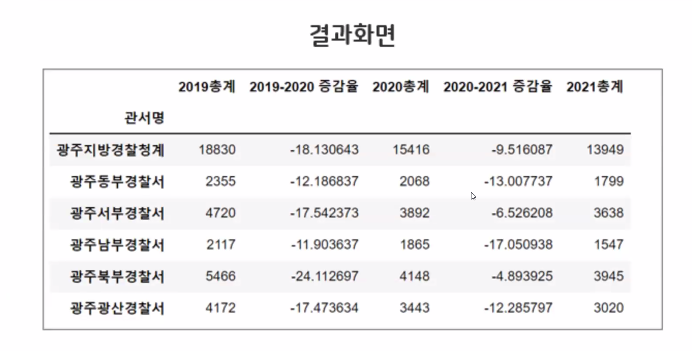

In [ ]:
# 데이터 읽어오기 (data2019, data2020, data2021)
# 인덱스는 '관서명' 으로 불러오기

In [78]:
data2019 = pd.read_csv('2019.csv', encoding='euc-kr', index_col='관서명')
data2019

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593
광주지방경찰청계,검거건수,18,47,758,5409,8301
광주지방경찰청계,검거인원,17,66,776,3433,11774
광주지방경찰청계,구속,9,33,42,104,58
광주지방경찰청계,불구속,1,26,511,2781,5618
광주지방경찰청계,기타,7,7,223,548,6098
광주동부경찰서,발생건수,3,5,92,1100,1155
광주동부경찰서,검거건수,4,6,86,583,970
광주동부경찰서,검거인원,4,7,98,447,1483


In [79]:
data2020 = pd.read_csv('2020.csv', encoding='euc-kr', index_col='관서명')
data2020

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,17,47,701,6052,8599
광주지방경찰청계,검거건수,18,47,713,4242,7631
광주지방경찰청계,검거인원,21,54,758,3455,10747
광주지방경찰청계,구속,14,25,37,132,57
광주지방경찰청계,불구속,3,25,491,2862,5267
광주지방경찰청계,기타,4,4,230,461,5423
광주동부경찰서,발생건수,3,8,83,832,1142
광주동부경찰서,검거건수,3,7,70,679,1002
광주동부경찰서,검거인원,4,10,71,543,1497


In [80]:
data2021 = pd.read_csv('2021.csv', encoding='euc-kr', index_col='관서명')
data2021

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366
광주지방경찰청계,검거건수,9,32,732,3487,7553
광주지방경찰청계,검거인원,10,61,824,3046,11018
광주지방경찰청계,구속,8,28,71,115,88
광주지방경찰청계,불구속,0,26,523,2493,5235
광주지방경찰청계,기타,2,7,230,438,5695
광주지방경찰청,발생건수,0,0,0,0,0
광주지방경찰청,검거건수,0,1,91,0,37
광주지방경찰청,검거인원,0,1,105,0,149


In [82]:
# 1. 특정 연도에만 존재하는 경찰청 삭제하기 !
# 21년도에 존재하는 '광주지방경찰청' 삭제
data2021.drop('광주지방경찰청',inplace=True)

In [92]:
# 2. 연도별 데이터의 총합 구하기 ('총합'이라는 column 추가하기)
data2019['총합']=data2019.loc[:,'살인':'폭력'].sum(axis=1)
data2020['총합']=data2020.loc[:,'살인':'폭력'].sum(axis=1)
data2021['총합']=data2021.loc[:,'살인':'폭력'].sum(axis=1)
data2019

,구분,살인,강도,강간·강제추행,절도,폭력,총합
관서명,,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593,18830
광주지방경찰청계,검거건수,18,47,758,5409,8301,14533
광주지방경찰청계,검거인원,17,66,776,3433,11774,16066
광주지방경찰청계,구속,9,33,42,104,58,246
광주지방경찰청계,불구속,1,26,511,2781,5618,8937
광주지방경찰청계,기타,7,7,223,548,6098,6883
광주동부경찰서,발생건수,3,5,92,1100,1155,2355
광주동부경찰서,검거건수,4,6,86,583,970,1649
광주동부경찰서,검거인원,4,7,98,447,1483,2039
